In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [6]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A. 데이터 전처리 
- 데이터 읽어오기

In [112]:
# CSV 파일 경로
csv_path = "C:/Users/SSAFY/Desktop/lee/data/NFLX.csv"

# CSV 파일 읽어오기(Data, Open, High, Low, Close 필드만 불러오기)
df = pd.read_csv(csv_path, usecols=range(0,5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 
- 2021년 이후의 종가 데이터 출력하기

In [113]:
# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021-01-01"]

# 출력하기
df_after_2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14100\2145271388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])


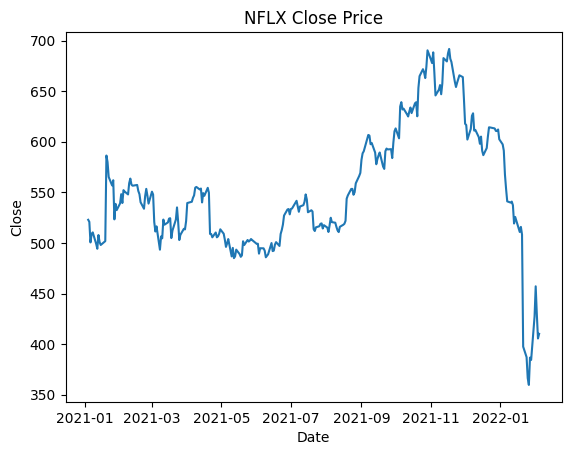

In [114]:
# 날짜 데이터 변환
df_after_2021["Date"] = pd.to_datetime(df_after_2021["Date"])

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_after_2021['Date'], df_after_2021['Close'])


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

# C. 데이터 분석 
- 2021년 이후 최고, 최저 종가 출력하기

In [115]:
# 최고, 최저 종가 출력하기
print("최고 종가:", max(df_after_2021['Close']))
print("최저 종가:", min(df_after_2021['Close']))

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 
- 2021년 이후 월 별 평균 종가 출력하기

In [116]:
df_after_2021['year'] = df_after_2021['Date'].dt.year
df_after_2021['month'] = df_after_2021['Date'].dt.month

new_df_after_2021 =df_after_2021.groupby(['year','month']).mean()
new_df_after_2021

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14100\3636465847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['year'] = df_after_2021['Date'].dt.year
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14100\3636465847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['month'] = df_after_2021['Date'].dt.month


Date        Open        High         Low  \
year month                                                                     
2021 1     2021-01-16 10:06:18.947368448  530.531051  537.838944  519.854214   
     2     2021-02-13 10:06:18.947368448  547.777366  555.494205  540.621576   
     3     2021-03-15 15:39:07.826086912  519.429134  527.057390  511.326090   
     4     2021-04-16 17:08:34.285714176  532.810952  537.802858  527.041430   
     5     2021-05-15 12:00:00.000000000  496.923996  502.062502  491.996503   
     6     2021-06-15 07:38:10.909090816  503.470914  508.116364  498.675455   
     7     2021-07-16 13:42:51.428571392  528.609045  534.298567  522.618091   
     8     2021-08-15 22:54:32.727272704  529.884541  535.937267  526.222275   
     9     2021-09-16 03:25:42.857142784  589.405233  598.170003  583.384760   
     10    2021-10-15 18:17:08.571428608  639.220474  648.829043  632.430001   
     11    2021-11-14 11:25:42.857142784  671.363334  677.726188  660.947617   
     12    2021-12-16 00:00:00.000000000  611.568640  616.962727  601.954548   
2022 1     2022-01-16 04:48:00.000000000  492.055000  498.946999  478.276000   
     2     2022-02-02 12:00:00.000000000  427.489998  438.122505  413.235008   

                 Close  
year month              
2021 1      526.816845  
     2      548.959999  
     3      518.123482  
     4      533.136662  
     5      496.714497  
     6      503.324091  
     7      528.653330  
     8      532.346817  
     9      590.795239  
     10     642.202849  
     11     667.524286  
     12     608.484089  
2022 1      487.853500  
     2      425.595009

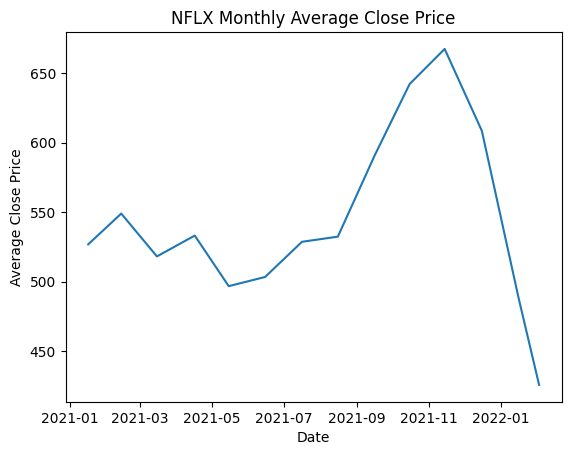

In [117]:
# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(new_df_after_2021['Date'], new_df_after_2021['Close'])

# 그래프 제목 설정
plt.title('NFLX Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# 그래프 표시
plt.show()

# E. 데이터 시각화 
- 2022년 이후 최고, 최저, 종가 시각화하기

In [118]:
# 2022년 이후 데이터 필터링
df_after_2022 = df[df["Date"] >= "2022-01-01"]

# 출력하기
df_after_2022

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


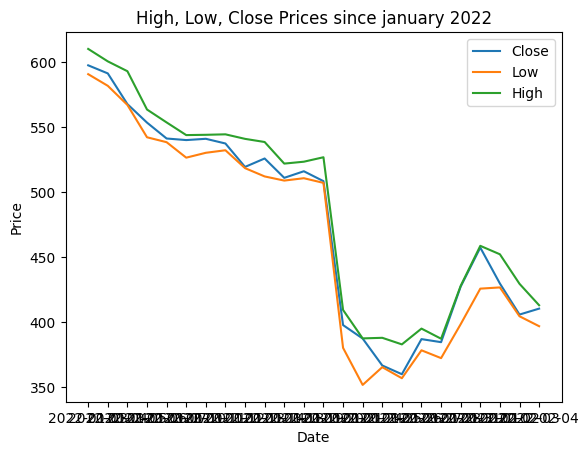

In [119]:
# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low, Close Prices since january 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()